1.	Escoge un problema de optimización de dos variables (o puedes crear uno también). Plantea su función de costo y las restricciones. Grafica la región factible con ayuda de Python. Desarrolla un programa que le permita al usuario:
a.	tener el valor de la función de costo a partir de un punto (x,y)
b.	ver gráficamente cómo cambia la región factible ante un cambio en las restricciones.


# Problema: Optimización de Producción en una Granja de Animales

Una granja se dedica a la cría de dos tipos de animales: **gallinas** y **conejos**. Ambos animales requieren espacio en el corral y comida diaria, pero en cantidades diferentes.

- Cada **gallina** requiere **2 metros cuadrados** de espacio en el corral y **1 kilogramo** de comida al día.
- Cada **conejo** requiere **1 metro cuadrado** de espacio en el corral y **3 kilogramos** de comida al día.

La granja tiene un total de **10 metros cuadrados** disponibles para los animales y puede proporcionar hasta **15 kilogramos** de comida al día.

Además, la granja obtiene una ganancia de **3 unidades monetarias** por cada **gallina** que cría y **4 unidades monetarias** por cada **conejo** que cría.

El objetivo de la granja es **maximizar las ganancias** diarias, pero está limitada por el espacio en el corral y la cantidad de comida disponible.

## Planteamiento Matemático del Problema:

**Función de costo (ganancia a maximizar):**

$$ f(x, y) = 3x + 4y $$

donde:
- $x$ es el número de **gallinas** que se crían.
- $y$ es el número de **conejos** que se crían.

**Restricciones (limitaciones de recursos):**

1. **Restricción de espacio en el corral**:  
   El espacio total utilizado por las gallinas y conejos no debe exceder los 10 metros cuadrados disponibles:

   $$ 2x + y \leq 10 $$

2. **Restricción de comida**:  
   La cantidad total de comida que necesitan las gallinas y conejos no debe exceder los 15 kilogramos disponibles por día:

   $$ x + 3y \leq 15 $$

3. **Restricciones no negativas**:  
   No es posible criar una cantidad negativa de gallinas o conejos:

   $$ x \geq 0 \quad  \text{y} \geq 0 $$


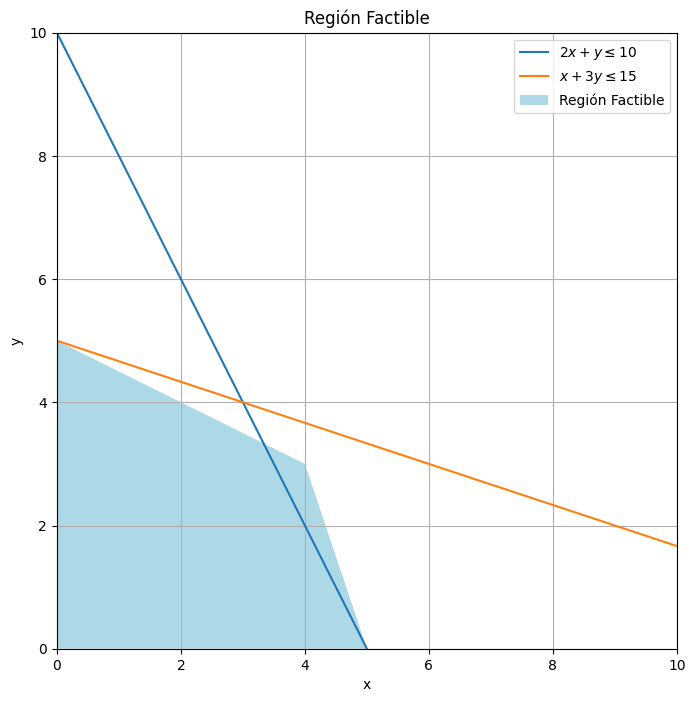

Parte A, Valor de la función de costo en (2, 3): 18


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Definir la función de costo
def funcion_costo(x, y):
    return 3*x + 4*y

# Restricciones
def restricciones(x, y):
    return [
        2*x + y <= 10,
        x + 3*y <= 15,
        x >= 0,
        y >= 0
    ]

# Graficar la región factible
def graficar_region_factible():
    x_vals = np.linspace(0, 10, 400)
    y_vals = np.linspace(0, 10, 400)


    plt.figure(figsize=(8, 8))

    plt.plot(x_vals, (10 - 2 * x_vals), label=r'$2x + y \leq 10$')
    plt.plot(x_vals, (15 - x_vals) / 3, label=r'$x + 3y \leq 15$')

    plt.xlim((0, 10))
    plt.ylim((0, 10))


    x = [0, 0, 4, 5]
    y = [0, 5, 3, 0]
    plt.fill(x, y, 'lightblue', label='Región Factible')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Región Factible')
    plt.legend()
    plt.grid(True)
    plt.show()


# Función para obtener el valor de la función de costo en un punto (x, y)
def valor_funcion_costo(x, y):
    return funcion_costo(x, y)


graficar_region_factible()
print(f"Parte A, Valor de la función de costo en (2, 3): {valor_funcion_costo(2, 3)}")

**Parte B:** Cambio en las restricciones:

*   $ 2x + y \leq 12$
*   $ x + 3y \leq 18$


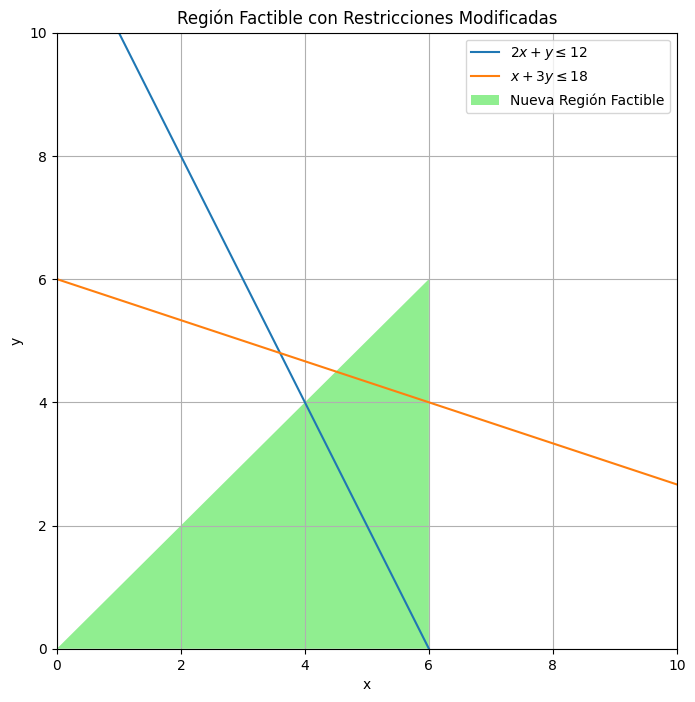

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Graficar la región factible
def graficar_regionmod(constante1, constante2):
    x_vals = np.linspace(0, 10, 400)
    y_vals = np.linspace(0, 10, 400)

    plt.figure(figsize=(8, 8))

    # Graficar las restricciones modificadas
    plt.plot(x_vals, (constante1 - 2 * x_vals), label=f'$2x + y \leq {constante1}$')
    plt.plot(x_vals, (constante2 - x_vals) / 3, label=f'$x + 3y \leq {constante2}$')

    plt.xlim((0, 10))
    plt.ylim((0, 10))

    # Actualizar la región factible
    x = [0, 0, min(constante1 / 2, constante2), constante2 / 3]
    y = [0, constante1 - 2 * x[2], constante2 / 3, 0]
    plt.fill(x, y, 'lightgreen', label='Nueva Región Factible')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Región Factible con Restricciones Modificadas')
    plt.legend()
    plt.grid(True)
    plt.show()


graficar_regionmod(12, 18)  # Cambiamos las constantes de ambas restricciones

2.	Selecciona un método de representación de matrices sparse e impleméntalo en Python desde cero. Compara tus resultados con la función de las librerías de Python.

In [ ]:
4#Implementación desde cero Compressed Sparse Row (CSR) (Método CSR)
class CSRMatrix:
    def __init__(self, matrix):
        self.values = []
        self.col_indices = []
        self.row_ptr = [0]
        self.build(matrix)

    def build(self, matrix):
        non_zero_count = 0
        for row in matrix:
            for idx, value in enumerate(row):
                if value != 0:
                    self.values.append(value)
                    self.col_indices.append(idx)
                    non_zero_count += 1
            self.row_ptr.append(non_zero_count)

    def print_matrix(self):
        print("Values: ", self.values)
        print("Column Indices: ", self.col_indices)
        print("Row Pointer: ", self.row_ptr)

def input_matrix():
    rows = int(input("Introduce el número de filas: "))
    cols = int(input("Introduce el número de columnas: "))

    matrix = []
    print("Introduce los valores fila por fila, separados por espacios:")

    for i in range(rows):
        row = list(map(int, input(f"Fila {i+1}: ").split()))
        if len(row) != cols:
            print(f"La fila debe tener exactamente {cols} elementos.")
            return None
        matrix.append(row)

    return matrix

# Ingreso de matriz por el usuario
user_matrix = input_matrix()

if user_matrix:
    # Crear la matriz CSR
    csr_matrix = CSRMatrix(user_matrix)
    csr_matrix.print_matrix()

Introduce el número de filas: 4
Introduce el número de columnas: 4
Introduce los valores fila por fila, separados por espacios:
Fila 1: 1 0 7 0
Fila 2: 0 0 0 9
Fila 3: 6 0 0 6
Fila 4: 1 0 0 0
Values:  [1, 7, 9, 6, 6, 1]
Column Indices:  [0, 2, 3, 0, 3, 0]
Row Pointer:  [0, 2, 3, 5, 6]


In [ ]:
#Implementación con librería SciPy
from scipy.sparse import csr_matrix   #importamos formato comprimido por filas

def input_matrix():
    rows = int(input("Introduce el número de filas: "))
    cols = int(input("Introduce el número de columnas: "))

    matrix = []
    print("Introduce los valores fila por fila, separados por espacios:")

    for i in range(rows):
        row = list(map(int, input(f"Fila {i+1}: ").split()))
        if len(row) != cols:
            print(f"La fila debe tener exactamente {cols} elementos.")
            return None
        matrix.append(row)

    return matrix

# Ingreso de matriz por el usuario
user_matrix = input_matrix()

if user_matrix:
    # Convertir la matriz a formato CSR usando SciPy
    scipy_csr = csr_matrix(user_matrix)

    # Imprimir la representación en CSR
    print("Values: ", scipy_csr.data)
    print("Column Indices: ", scipy_csr.indices)
    print("Row Pointer: ", scipy_csr.indptr)

Introduce el número de filas: 4
Introduce el número de columnas: 4
Introduce los valores fila por fila, separados por espacios:
Fila 1: 0 0 3 0
Fila 2: 22 0 0 0
Fila 3: 0 0 0 4
Fila 4: 0 0 7 0
Values:  [ 3 22  4  7]
Column Indices:  [2 0 3 2]
Row Pointer:  [0 1 2 3 4]


3.	Crea un programa para implementar la expansión en series de Taylor. El usuario debe ingresar la cantidad de términos de la expansión, el punto de expansión y la función a representar (debe tener al menos 5 funciones diferentes para escoger). Se debe mostrar en una gráfica la función original y la aproximación.

Funciones disponibles:
1: exp(x)
2: sin(x)
3: cos(x)
4: log(1 + x)
5: x**2 + 3*x + 2
Elige una función por su número: 1
Introduce el punto de expansión (a): 2
Introduce el número de términos de la serie de Taylor (n): 3


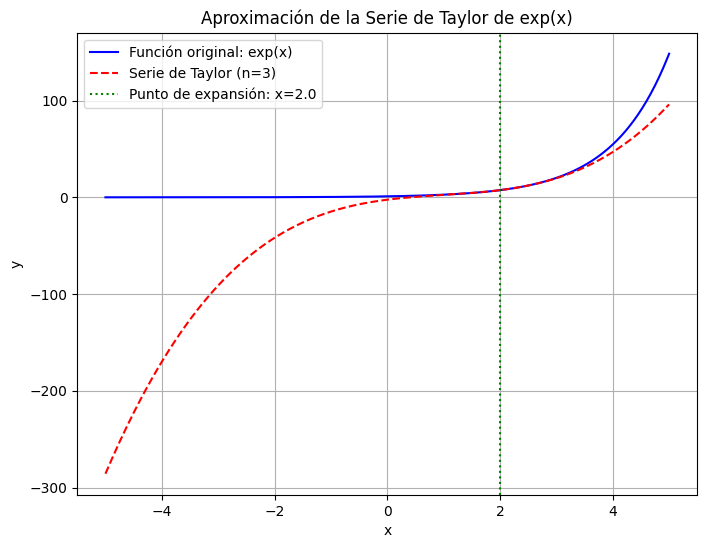

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, exp, sin, cos, log, diff, lambdify
import math

x = symbols('x')

# Definir funciones disponibles
funciones = {
    'exp(x)': exp(x),
    'sin(x)': sin(x),
    'cos(x)': cos(x),
    'log(1 + x)': log(1 + x),
    'x**2 + 3*x + 2': x**2 + 3*x + 2
}

# Función para calcular la serie de Taylor
def taylor_1(f, xs, x: float, a: float, n: int) -> None:
    fa, dfi = 0, f
    for i in range(n + 1):
        fa += (dfi.subs(xs, a) * (x - a) ** i / math.factorial(i))
        dfi = dfi.diff(xs)  # Derivada de orden i-ésimo
    return fa

# Función para mostrar la serie de Taylor y la función original
def graficar_taylor(funcion_str, a, n):

    f = funciones[funcion_str]

    # Calcular la serie de Taylor
    taylor_f = taylor_1(f, x, x, a, n)

    # Convertir la serie de Taylor y la función original en funciones evaluables
    taylor_f_lambdified = lambdify(x, taylor_f, modules='numpy')
    f_lambdified = lambdify(x, f, modules='numpy')


    x_vals = np.linspace(-5, 5, 400)
    y_vals = f_lambdified(x_vals)
    taylor_vals = taylor_f_lambdified(x_vals)

    # Graficar
    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_vals, label=f'Función original: {funcion_str}', color='blue')
    plt.plot(x_vals, taylor_vals, label=f'Serie de Taylor (n={n})', linestyle='--', color='red')
    plt.axvline(a, color='green', linestyle=':', label=f'Punto de expansión: x={a}')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Aproximación de la Serie de Taylor de {funcion_str}')
    plt.grid(True)
    plt.show()

# Ejemplo de uso: pedir al usuario los parámetros
print("Funciones disponibles:")
for i, funcion in enumerate(funciones.keys()):
    print(f"{i + 1}: {funcion}")

funcion_elegida = int(input("Elige una función por su número: ")) - 1
a = float(input("Introduce el punto de expansión (a): "))
n = int(input("Introduce el número de términos de la serie de Taylor (n): "))

# Graficar la aproximación de la serie de Taylor
funcion_str = list(funciones.keys())[funcion_elegida]
graficar_taylor(funcion_str, a, n)

4.	Escoge 3 algoritmos de optimización sin restricciones. Realiza cambios sobre sus parámetros y sobre el punto inicial. ¿Cómo afectan estos cambios los resultados? ¿Cómo afecta el tiempo de convergencia o cantidad de iteraciones? Nota: Puedes utilizar las librerías de Python y alguna ayuda gráfica o tabulaciones si lo necesitan para soportar sus conclusiones.

In [33]:
from sympy import diff
from sympy.abc import x
import pandas as pd
import matplotlib.pyplot as plt
import time


Ingrese el numero de iteraciones: 45
Ingrese el valor de x0: 2
2.0
x**3
3*x**2
6*x
12.0000000000000
                       x                  f(x)
0                    2.0                   8.0
1       1.00000000000000      1.00000000000000
2      0.500000000000000     0.125000000000000
3      0.250000000000000    0.0156250000000000
4      0.125000000000000   0.00195312500000000
5     0.0625000000000000  0.000244140625000000
6     0.0312500000000000   3.05175781250000e-5
7     0.0156250000000000   3.81469726562500e-6
8    0.00781250000000000   4.76837158203125e-7
9    0.00390625000000000   5.96046447753906e-8
10   0.00195312500000000   7.45058059692383e-9
11  0.000976562500000000  9.31322574615479e-10
12  0.000488281250000000  1.16415321826935e-10
13  0.000244140625000000  1.45519152283669e-11
14  0.000122070312500000  1.81898940354586e-12
15   6.10351562500000e-5  2.27373675443232e-13
16   3.05175781250000e-5  2.84217094304040e-14
17   1.52587890625000e-5  3.55271367880050e-15
18   7.

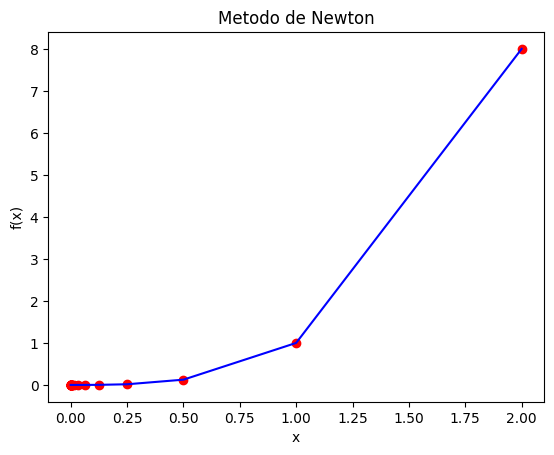

In [40]:
# metodo de newton


max_iter = input("Ingrese el numero de iteraciones: ")
max_iter = int(max_iter)
# define start point x0
x_previous = input("Ingrese el valor de x0: ")
x_previous = float(x_previous)
print(x_previous)
# define lists of x and f(x)
f = (x)**3
df= diff(f)
ddf = diff(df)
a= df.subs(x,x_previous)
print(f)
print(df)
print(ddf)
print(a)
x_list = list()
fx_list = list()
# add first x and f(x)
x_list.append(x_previous)
fx_list.append((x_previous)**3)
# start iterations
start_time = time.time()

for _ in range(max_iter):
# calculate the next step (x)
  fd= df.subs(x,x_previous)
  fd2= ddf.subs(x,x_previous)
  x_next = x_previous - (fd) / (fd2)
                # calculate next f(x)
  fx = (x_next)**3
                                                      # store results
  x_list.append(x_next)
  fx_list.append(fx)
# prepare next iteration
  x_previous = x_next
# prepare dataframe to sho
  data = pd.DataFrame({'x': x_list, 'f(x)': fx_list})
# show result
print(data)
end_time = time.time()
print("tiempo de ejecucion",end_time-start_time)
for xi, fxi in zip(x_list, fx_list):
    plt.plot(xi, fxi, 'ro')
plt.plot(x_list, fx_list, 'b-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Metodo de Newton')
plt.show()

In [37]:
# Metodo de gradiente descendente


max_iter = input("Ingrese el numero de iteraciones: ")
max_iter = int(max_iter)
learning_rate = input("Ingrese la tasa de aprendizaje (learning rate): ")
learning_rate = float(learning_rate)
x_previous = input("Ingrese el valor de x0: ")
x_previous = float(x_previous)
f = (x - 4)**3
df = diff(f)
a = df.subs(x, x_previous)
print("Gradiente (primera derivada):", df)
print("Gradiente en el punto inicial:", a)
x_list = []
fx_list = []
x_list.append(x_previous)
fx_list.append(f.subs(x, x_previous))
start_time = time.time()
for _ in range(max_iter):
    gradient = df.subs(x, x_previous)
    x_next = x_previous - learning_rate * gradient
    fx = f.subs(x, x_next)
    x_list.append(x_next)
    fx_list.append(fx)
    x_previous = x_next
data = pd.DataFrame({'x': x_list, 'f(x)': fx_list})
print(data)
end_time = time.time()
print("Tiempo de ejecución:", end_time - start_time)


Ingrese el numero de iteraciones: 56
Ingrese la tasa de aprendizaje (learning rate): 0.1
Ingrese el valor de x0: 2
Gradiente (primera derivada): 3*(x - 4)**2
Gradiente en el punto inicial: 12.0000000000000
                                      x                                  f(x)
0                                   2.0                     -8.00000000000000
1                     0.800000000000000                     -32.7680000000000
2                     -2.27200000000000                     -246.727835648000
3                     -14.0733952000000                     -5903.63141996002
4                     -112.067679416615                     -1563629.67701512
5                     -4153.57954096405                     -71865706613.7437
6                     -5189793.87137382                 -1.39782025965456e+20
7                     -8080205773508.73                 -5.27554415661981e+38
8                 -1.95869176027006e+25                 -7.51446886008957e+75
9             

In [41]:
import numpy as np

# Método de búsqueda aleatoria

def f(x):
    return (x - 4)**3
num_samples = int(input("Ingrese el número de muestras: "))
x_range_min = float(input("Ingrese el valor mínimo del rango de búsqueda: "))
x_range_max = float(input("Ingrese el valor máximo del rango de búsqueda: "))
x_list = []
fx_list = []
start_time = time.time()
for _ in range(num_samples):
    x_random = np.random.uniform(x_range_min, x_range_max)
    fx_random = f(x_random)
    x_list.append(x_random)
    fx_list.append(fx_random)
data = pd.DataFrame({'x': x_list, 'f(x)': fx_list})
print(data)
end_time = time.time()
print("Tiempo de ejecución:", end_time - start_time)

Ingrese el número de muestras: 12
Ingrese el valor mínimo del rango de búsqueda: 1
Ingrese el valor máximo del rango de búsqueda: 20
            x         f(x)
0   18.392911  2981.576440
1   10.823382   317.686767
2    8.730854   105.881128
3    6.350188    12.980983
4    6.657335    18.764593
5   19.285889  3571.676391
6   15.192657  1402.166487
7   15.169353  1393.426420
8   18.682736  3165.344638
9    7.717268    51.365525
10   9.713853   186.546496
11   8.199061    74.038340
Tiempo de ejecución: 0.006448268890380859


Al cambiar el punto inicial o el rango en el caso de la busqueda aleatoria, la posicion del area de optima dentro de una grafica cambia dependiendo de dicho valor, pues debido alrededor de este que las funciones estaran evaluando y buscando la optimizacion. Lo que cambia de gran manera el resultado seria el cambiar la funcion inicial que se le da. Ademas, la cantidad de iteraciones afecta en tiempo de ejecucion un poco, se deben usar una gran cantidad para poder apreciar un cambio, sin embargo en algunos algoritmos tambien afecta la presicion de los datos, pues al aumentar la cantidad llega un punto en que todos ellos se vuelven tan pequeños pero en una misma area.
